<span style="color:green">Exploration_02 Iris의 세가지 품종, 분류해볼 수 있겠어요?</span>

이번 미니 프로젝트에서는 총 3가지의 분류기를 만든다.

손글씨 분류 / 와인 분류 / 유방암 여부 진단

이에 따른 각각의 목차는 다음과 같다.
  1. 필요한 모듈 import
  2. 데이터 준비
  3. train / test 데이터 분리
  4. 다양한 모델로 학습 및 평가
  5. 결론


# step 1. 손글씨 분류

## 1. 필요한 모듈 import
  - 사이킷런에서 손글씨 데이터를 불러온다.
  - train / test 데이터를 나눠주기 위해서 train_test_split을 사용한다.

In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

## 2. 데이터 준비
  - 가져온 데이터셋을 확인해본다.
  - Feature Data 지정하기
  - Label Data 지정하기

In [36]:
digits = load_digits()

print(dir(digits))  # dir()은 객체가 어떤 변수와 메서드를 가지고 있는지 보여준다.

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']


In [24]:
digits.keys() # keys()는 digits에 어떤 정보들이 담겨있는지 보여준다.

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [25]:
digits_data = digits.data # Feature Data를 지정해준다.

print(digits_data.shape) #digits에 총 몇개의 데이터와 정보를 담고 있는지 보여준다.

(1797, 64)


In [11]:
digits_label = digits.target # Label Data를 지정해준다. 머신러닝에서 모델이 출력해야 하는 정답을 라벨(Label) 혹은 타겟(Target)이라 한다.

print(digits_label.shape)

(1797,)


## 3. train / test 데이터 분리
  - sklearn.model_selection 패키지의 train_test_split을 활용해서 train / test 데이터를 분리해준다.

In [15]:
X_train, X_test, y_train, y_test = train_test_split(digits_data,
                                                   digits_label,
                                                   test_size=0.2,
                                                   random_state=7)

# 첫번째 파라미터인 digits_data는 문제지라고 생각하면 이해하기 쉽다.
# 두밴째 파라미터인 digits_label은 모델이 맞춰야 하는 정답으로 이해하면 쉽다.
# 세번째 파라미터인 test_size=0.2는 train 데이터와 test 데이터의 비율을 8 : 2 로 한다는 의미이다.
# 마지막으로 쓰인 random_state는 train 데이터와 test 데이터를 분리할때 랜덤으로 분리하게 해준다.
# 랜덤으로 분리해주지 않으면 받은 데이터의 뒤쪽 20%가 순차적으로 테스트용 데이터셋으로 만들어지기 때문에 정확한 테스트를 할 수 없게 된다.
# random_state = 에 들어가는 숫자의 의미에 대해서 궁금했는데 숫자는 중요하지 않다는 결론을 얻었다.
# 숫자보다는 random_state를 사용해서 데이터를 섞어주는 것이 중요하다.

print(len(X_train),len(X_test))

1437 360


## 4. 다양한 모델로 학습 및 평가
  - Decision Tree
  - Random Forest
  - SVM
  - SGD Classifier
  - Logistic Regression

In [27]:
# 첫번째 사용할 모델은 Decision Tree
# Decision Tree는 직관적이면서도 간단해서 분류 문제를 풀 때 기본적으로 사용되는 모델 중 하나이다.
# 한국말로는 의사결정나무 라고 불리는데 그 이유는 데이터를 분리해나가는 모습이 나무를 뒤집어놓은 것과 같은 모양이기 때문이라고 한다.

from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=32)
decision_tree.fit(X_train, y_train) # Decision Tree 모델을 사용해서 학습시키는 과정

y_pred = decision_tree.predict(X_test) # 테스트에 사용할 데이터를 넣어서 학습된 모델의 정확도를 확인하는 과정

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.81      0.81      0.81        42
           2       0.79      0.82      0.80        40
           3       0.79      0.91      0.85        34
           4       0.83      0.95      0.89        37
           5       0.90      0.96      0.93        28
           6       0.84      0.93      0.88        28
           7       0.96      0.82      0.89        33
           8       0.88      0.65      0.75        43
           9       0.78      0.78      0.78        32

    accuracy                           0.86       360
   macro avg       0.86      0.86      0.86       360
weighted avg       0.86      0.86      0.85       360



In [28]:
# 두번째 사용할 모델은 Random Forest
# Random Forest는 Decision Tree의 단점을 극복한 모델로 소개되어 있다.
# Decision Tree 모델을 여러 개 합쳐놓음으로써 모델 한개만 사용할 때의 단점을 집단지성으로 극복하는 개념이다.

from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.93      1.00      0.97        42
           2       1.00      1.00      1.00        40
           3       1.00      1.00      1.00        34
           4       0.93      1.00      0.96        37
           5       0.90      0.96      0.93        28
           6       1.00      0.96      0.98        28
           7       0.94      0.97      0.96        33
           8       1.00      0.84      0.91        43
           9       0.94      0.94      0.94        32

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.97      0.96      0.96       360



In [30]:
# 세번째 사용할 모델은 Support Vector Machine(SVM)
# SVM은 Support Vector와 Hyperplane을 이용해서 분류를 수행하게 되는 대표적인 선형 분류 알고리즘이다.
# SVM 원리에 대해서는 lms 내용만으로 충분한 이해가 어렵기 때문에 추가적인 구글링 혹은 강의를 통해서 공부해야 할 것 같다.

from sklearn import svm
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.95      1.00      0.98        42
           2       1.00      1.00      1.00        40
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        37
           5       0.93      1.00      0.97        28
           6       1.00      1.00      1.00        28
           7       1.00      1.00      1.00        33
           8       1.00      0.93      0.96        43
           9       1.00      0.97      0.98        32

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



In [31]:
# 네번째 사용할 모델은 Stochastic Gradient Descent Classifier(SGDClassifier)
# SGD는 배치 크기가 1인 경사하강법 알고리즘이다.

from sklearn.linear_model import SGDClassifier
sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train)

y_pred = sgd_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.88      0.88      0.88        42
           2       0.98      1.00      0.99        40
           3       0.89      0.91      0.90        34
           4       0.97      1.00      0.99        37
           5       0.80      1.00      0.89        28
           6       1.00      0.93      0.96        28
           7       0.97      0.97      0.97        33
           8       0.90      0.88      0.89        43
           9       0.96      0.75      0.84        32

    accuracy                           0.93       360
   macro avg       0.94      0.93      0.93       360
weighted avg       0.94      0.93      0.93       360



In [33]:
# 다섯번째 사용할 모델은 Logistic Regression
# Logistic Regression은 가장 널리 알려진 선형 분류 알고리즘 소프트맥스 함수를 사용한 다중 클래스 분류 알고리즘이다.

from sklearn.linear_model import LogisticRegression
logi_model = LogisticRegression()
logi_model.fit(X_train, y_train)

y_pred = logi_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.95      0.95      0.95        42
           2       0.98      1.00      0.99        40
           3       0.94      0.97      0.96        34
           4       0.97      1.00      0.99        37
           5       0.82      0.96      0.89        28
           6       1.00      0.96      0.98        28
           7       0.97      0.97      0.97        33
           8       0.92      0.81      0.86        43
           9       0.97      0.91      0.94        32

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.95      0.95      0.95       360



/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 5. 결론
  - 손글씨 분류의 모델 평가에는 정밀도나 재현율보다는 단순 판별 정확도가 중요하다고 생각해서 정확도가 높은 모델을 사용하는게 좋을 것 같다고 생각했다.
  - 각 모델별 accuracy의 값은 다음과 같다.
  - Decision Tree <0.86>
  - Random Forest <0.96>
  - SVM <0.99>
  - SGD Classifier <0.93>
  - Logistic Regression <0.95>
  - 데이터를 단순 글씨로만 보기에는 가독성이 떨어질 것 같아서 노드에서 배운 시각화를 통해서 보기 쉽게 바 그래프를 통해 나타내 보았다.
  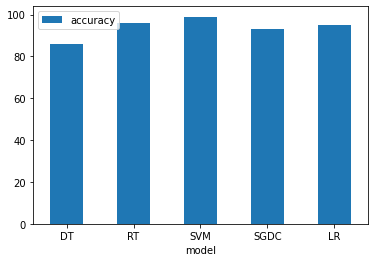
  ### - 최종적으로 손글씨 분류 모델의 경우에는 가장 정확도가 높은  SVM 모델을 사용하는 것이 좋다는 결론을 내릴 수 있었다.

# step 2. 와인 분류


## 1. 필요한 모듈 import
  - 사이킷런에서 와인 데이터를 불러온다.
  - train / test 데이터를 나눠주기 위해서 train_test_split을 사용한다.

In [34]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

## 2. 데이터 준비

  - 가져온 데이터셋을 확인해본다.
  - Feature Data 지정하기
  - Label Data 지정하기

In [38]:
wine = load_wine()

print(dir(wine))  # dir()은 객체가 어떤 변수와 메서드를 가지고 있는지 보여준다.

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']


In [39]:
wine.keys() # keys()는 wine이 어떤 정보들이 담겨있는지 보여준다.

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [40]:
wine_data = wine.data # Feature Data를 지정해준다.

print(wine_data.shape) #wine 총 몇개의 데이터와 정보를 담고 있는지 보여준다.

(178, 13)


In [41]:
wine_label = wine.target # Label Data를 지정해준다.

print(wine_label.shape)

(178,)


## 3. train / test 데이터 분리
  - sklearn.model_selection 패키지의 train_test_split을 활용해서 train / test 데이터를 분리해준다.

In [42]:
X_train, X_test, y_train, y_test = train_test_split(wine_data,
                                                   wine_label,
                                                   test_size=0.2,
                                                   random_state=7)

print(len(X_train),len(X_test)) # 총 178개의 데이터를 8:2 비율인 142와 36으로 나누어준다.

142 36


## 4. 다양한 모델로 학습 및 평가
  - Decision Tree
  - Random Forest
  - SVM
  - SGD Classifier
  - Logistic Regression

In [43]:
# 모델이 5가지로 각각 다 코드를 쓰기에는 많기 때문에 For 반복문을 사용하면 좀 더 편하게 작업할 수 있다.

models = [decision_tree, random_forest, svm_model, sgd_model, logi_model]

for a in models:
    a.fit(X_train, y_train)
    y_pred = a.predict(X_test)
    print('<', a, '>')
    print(classification_report(y_test, y_pred))
    print(' ')    

< DecisionTreeClassifier(random_state=32) >
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.89      1.00      0.94        17
           2       1.00      0.83      0.91        12

    accuracy                           0.94        36
   macro avg       0.96      0.94      0.95        36
weighted avg       0.95      0.94      0.94        36

 
< RandomForestClassifier(random_state=32) >
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        12

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

 
< SVC() >
              precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.58    

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 5. 결론

  - 와인 분류의 모델 같은 경우 precision과 recall의 차이가 크게 나타나는 모델들이 있었다.
  - SVM / SGDClassifier 모델은 다른 모델들에 비해서 precision과 recall의 값이 차이가 큰걸 볼 수 있었다.
  - 그렇기 때문에 precision과 recall 값의 조화평균을 나타내는 F1 스코어를 가지고 평가하는게 좋을 것 같다고 생각했다.
  - 각 모델별 F1 스코어의 값은 다음과 같다.
  - Decision Tree <0.94>
  - Random Forest <1.00>
  - SVM <0.54>
  - SGD Classifier <0.49>
  - Logistic Regression <0.97>
  - 시각화한 자료는 다음과 같다.
  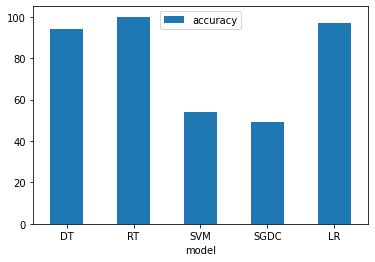
  ### - 최종적으로 와인 분류 모델의 경우에는 F1스코어가 가장 높은 모델인 RandomForest를 사용하는 것이 좋다고 생각한다.

# step 3. 유방암 여부 진단


## 1. 필요한 모듈 import
  - 사이킷런에서 유방암 여부 데이터를 불러온다.
  - train / test 데이터를 나눠주기 위해서 train_test_split을 사용한다.

In [44]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

## 2. 데이터 준비

  - 가져온 데이터셋을 확인해본다.
  - Feature Data 지정하기
  - Label Data 지정하기

In [45]:
breast_cancer = load_breast_cancer()

print(dir(breast_cancer))  # dir()은 객체가 어떤 변수와 메서드를 가지고 있는지 보여준다.

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']


In [46]:
breast_cancer.keys() # keys()는 breast_cancer가 어떤 정보들이 담겨있는지 보여준다.

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [49]:
breast_cancer_data = breast_cancer.data # Feature Data를 지정해준다.
breast_cancer_label = breast_cancer.target # Label Data를 지정해준다.


print(breast_cancer_data.shape)
print(breast_cancer_label.shape)

(569, 30)
(569,)


## 3. train / test 데이터 분리
  - sklearn.model_selection 패키지의 train_test_split을 활용해서 train / test 데이터를 분리해준다.

In [48]:
X_train, X_test, y_train, y_test = train_test_split(breast_cancer_data,
                                                   breast_cancer_label,
                                                   test_size=0.2,
                                                   random_state=7)

print(len(X_train),len(X_test))

455 114


## 4. 다양한 모델로 학습 및 평가
  - Decision Tree
  - Random Forest
  - SVM
  - SGD Classifier
  - Logistic Regression

In [52]:
for b in models:
    b.fit(X_train, y_train)
    y_pred = b.predict(X_test)
    print('<', b, '>')
    print(classification_report(y_test, y_pred))
    print(' ')

< DecisionTreeClassifier(random_state=32) >
              precision    recall  f1-score   support

           0       0.92      0.82      0.87        40
           1       0.91      0.96      0.93        74

    accuracy                           0.91       114
   macro avg       0.91      0.89      0.90       114
weighted avg       0.91      0.91      0.91       114

 
< RandomForestClassifier(random_state=32) >
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        74

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114

 
< SVC() >
              precision    recall  f1-score   support

           0       1.00      0.72      0.84        40
           1       0.87      1.00      0.93        74

    accuracy                           0.90       114
   macro avg       0.94   

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 5. 결론

  - 의료 데이터의 경우 재현율(recall)이 많이 평가 지표로 사용된다.
  - 의료 데이터의 특징은 음성을 양성으로 판단하는 것보다 양성을 음성으로 판단하는 것이 더 치명적이기 때문이다.
  - 재현율(recall)이 높으려면 양성인데 음성으로 판단하는 경우가 적어야 한다.
  - 그렇기 때문에 평가 지표로 재현율(recall)을 사용하는 것이 좋다고 생각했다.
  - 각 모델별 재현율(recall)의 값은 다음과 같다.
  - Decision Tree <0.91>
  - Random Forest <1.00>
  - SVM <0.90>
  - SGD Classifier <0.86>
  - Logistic Regression <0.95>
  - 시각화한 자료를 보면 다음과 같다.
  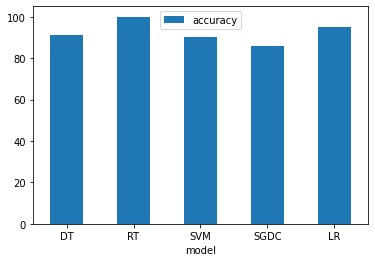
  ### - 최종적으로 유방암 여부 진단의 경우에는 재현율(recall)이 가장 높은 모델인 RandomForest를 사용하는 것이 좋다고 생각한다.

## 회고

### 미니프로젝트를 하면서 배운점
  
  - 각각의 모델들은 평가하려는 대상이나 환경에 따라서 사용처, 그리고 결과도 각각 다르게 나온다는 것이다.
  - 스팸메일분류 / 의료 부분 평가 등과 같이 그냥 정확도만 가지고 판단하는 것이 아닌 대상과 환경에 따라 평가 지표를 다르게 해야 한다는 것이다.
  - 본 미니프로젝트에서는 5가지의 모델을 사용했지만 5가지 모델의 사용 방법이 크게 다르지 않다는 점이 놀라웠다.
  - 각각 모델의 이름에 따라서 코드만 조금씩 바꿔주면 그 모델에 맞게 작동하는 것을 보면서 코드 작성과 모델을 만드는 것에 대해서 조금 친밀해 진것 같다.
  
  
### 미니프로젝트를 하면서 느낀점

  - 미니프로젝트를 하면서 가장 크게 느낀점은 개발자가 되기 위해서는 정말 끊임없는 공부가 필요하다는 것이다.
  - 물론 비전공자의 입장에서 전공자 혹은 유경험자와 비교하면 많이 뒤쳐지는 것은 사실이지만 노드 공부와 다양한 구글링을 통해서 나도 할 수 있다는 것이 새롭고 재미있게 다가왔다.
  - 아직은 공부의 초기이고 더 공부를 해갈수록 어렵고 복잡한 내용들, 모르는 내용들이겠지만 도전해볼만하다고 생각한다.
  - 특히 구글에 방대한양의 정보가 있어서 학습으로 이해 안되는 부분들에 대해서 많이 도움을 받을 수 있었다.
  
### 미니프로젝트를 하면서 어려웠던 점
  
  - 본 미니프로젝트에는 적은양의 데이터만 사용되어서 쉽게 데이터를 분석하고 모델에 넣어서 작동시킬 수 있었지만 데이터양이 더 많아지면 어떻게 데이터를 분석하고 또 분석한 데이터를 어떻게 적절한 모델에 넣어서 작동시켜야할지 많은 경험이 필요하다고 생각한다.
  - 노드에서 알려주는 라이브러리, 패키지, 모듈을 사용했지만 구글을 검색해보면 내가 모르는 더 편리한 기능을 가진 라이브러리, 패키지, 모듈이 많았다. 이것들에 대한 정리도 필요하다고 느꼇다.
  - 모델을 평가하고 나서 나온 정보들을 보기 쉽게 정리하려고 노력했지만 각각의 모델에서 나온 데이터들을 한번에 모아서 깔끔하게 정리하는게 생각보다 어려웠다. 특히 더 많은 양을 분석하고 나온 데이터들을 보기 쉽게 시각화 및 정리하려면 그 부분에 있어서 좀 더 많은 공부가 필요하다고 생각한다.

### 본 미니프로젝트와는 상관없이 분석한 데이터를 어떻게 한 눈에 보기 쉽게 시각화 할 수 있을까? 생각하다가 그래프로 만들어보기로 했다.
  
  - 손글씨분류 / 와인분류 / 유방암 판별 / 모든 데이터를 한번에 모아서 시각화하기는 아직 나에게 꽤 어려운 작업이었다.
  - 그래서 각 분류마다 얻은 결과값 중 내가 말하고 싶은 부분에 대해서만 그래프로 만들어서 보기 쉽게 표현하려고 했다.
  - 각각의 작업에서 사용해야 할 분류 모델 중에서 그 모델이 내놓은 값을 가지고 그래프를 만들었다.

In [14]:
import pandas as pd

wine_model_ac = {'model':['DT', 'RT', 'SVM', 'SGDC', 'LR'],
                'accuracy': [86, 96, 99, 93, 95]}

df = pd.DataFrame(wine_model_ac)
print(df)

  model  accuracy
0    DT        86
1    RT        96
2   SVM        99
3  SGDC        93
4    LR        95


<AxesSubplot:xlabel='model'>

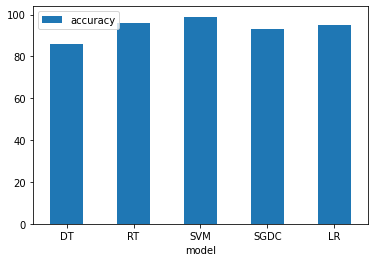

In [15]:
df.plot.bar(x='model', y='accuracy', rot=0)